In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_excel('./Datasheet_sand_positions.xlsx')
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]

# Trial as index
df = df.set_index('trial')

# Filter to valied trials
df = df[df['valid'] == 'yes']
df = df[df['mussel'] == 'yes']

# Select Useful columns
df = df[[
    'species',
    'success',
    'duration',
    'x_food_cm',
    'y_food_cm',
    'x0_cm',
    'y0_cm',
    'x_end_cm',
    'y_end_cm'
]]

df = df.rename(columns={
    'duration': 'duration_s'
})

# Coverting x,y coordinates to cm
df[['x_food_cm',
    'x0_cm',
    'x_end_cm']] *= 114

df[['y_food_cm',
    'y0_cm',
    'y_end_cm']] *= 90

data_cols = [
    'x_food_cm',
    'y_food_cm',
    'x0_cm',
    'y0_cm',
    'x_end_cm',
    'y_end_cm'
]

df[data_cols] = df[data_cols].astype(int)

# Filter out malformed rows
df = df[~df.index.isin([18,21,41])]

df

,species,success,duration_s,x_food_cm,y_food_cm,x0_cm,y0_cm,x_end_cm,y_end_cm
trial,,,,,,,,,
1,carolinus,1.0,356,25,33,2,82,30,35
2,carolinus,1.0,122,29,67,14,18,27,66
4,carolinus,1.0,268,30,66,9,42,30,65
5,evolans,1.0,661,30,49,3,15,31,52
6,evolans,0.0,900,30,25,101,28,103,93
...,...,...,...,...,...,...,...,...,...
168,carolinus,1.0,130,29,48,62,66,29,49
170,carolinus,1.0,13,21,49,75,64,20,47
171,carolinus,0.0,900,79,13,63,70,25,49


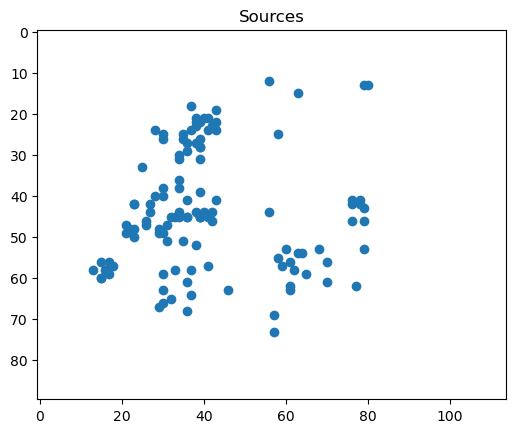

In [12]:
plt.title('Sources')
plt.imshow(np.zeros((90,114)), cmap='Greys')
plt.scatter(df['x_food_cm'], df['y_food_cm'], label='source')
plt.show()

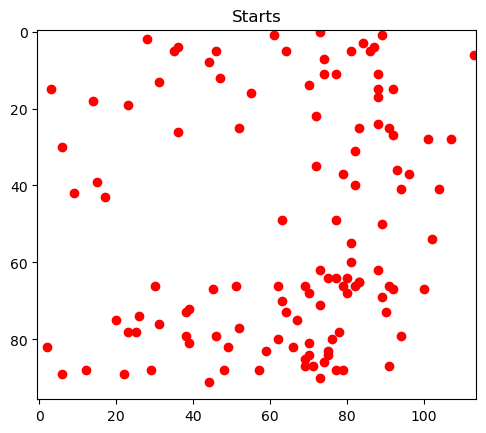

In [10]:
plt.title('Starts')
plt.imshow(np.zeros((90,114)), cmap='Greys')
plt.scatter(df['x0_cm'], df['y0_cm'], label='start', c='red')
plt.show()

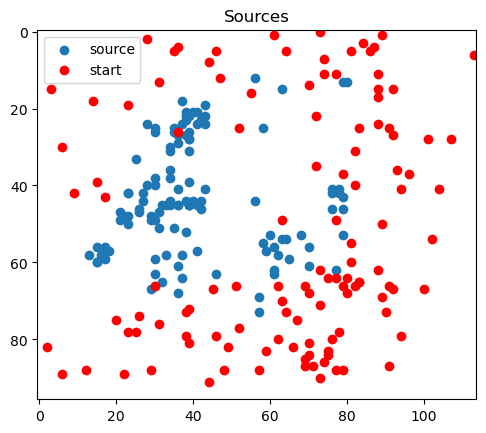

In [13]:
plt.title('Sources')
plt.imshow(np.zeros((90,114)), cmap='Greys')
plt.scatter(df['x_food_cm'], df['y_food_cm'], label='source')
plt.scatter(df['x0_cm'], df['y0_cm'], label='start', c='red')
plt.legend()
plt.show()

In [14]:
df.to_csv('./experimental_positions.csv')